# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
apples = pd.read_csv('appl_1980_2014.csv')
apples.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 3. Assign it to a variable apple

In [5]:
# already done

### Step 4.  Check out the type of the columns

In [6]:
apples.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [20]:
apples['Date'] = pd.to_datetime(apples['Date'])
apples

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 6.  Set the date as the index

In [24]:
apples = apples.set_index('Date')
apples

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [39]:
apples.index.has_duplicates

False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [41]:
apples = apples.sort_index()
apples

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [77]:
criteria = apples.index.year.astype(str) \
              + '-' \
              + apples.index.month.astype(str)
grouped = apples.index \
                                                .groupby(criteria) \
                                                .values()
last_business_days = pd.Series(map(lambda l: l[-1], grouped)) \
                                    .sort_values()
last_business_days

0     1980-12-31
1     1981-01-30
5     1981-02-27
6     1981-03-31
7     1981-04-30
         ...    
399   2014-03-31
400   2014-04-30
401   2014-05-30
402   2014-06-30
403   2014-07-08
Length: 404, dtype: datetime64[ns]

### Step 10.  What is the difference in days between the first day and the oldest

In [80]:
(apples.index[-1] - apples.index[0]).days

12261

### Step 11.  How many months in the data we have?

In [81]:
len(last_business_days)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

(array([6451.,  543.,  375.,  142.,  185.,  164.,  151.,  202.,  175.,
          77.]),
 array([ 0.17 ,  9.781, 19.392, 29.003, 38.614, 48.225, 57.836, 67.447,
        77.058, 86.669, 96.28 ]),
 <BarContainer object of 10 artists>)

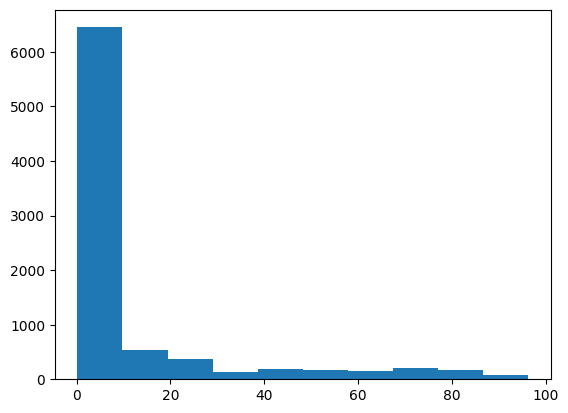

In [113]:
adj_close = apples['Adj Close'].copy()
plt.hist(adj_close)

### BONUS: Create your own question and answer it.

In [ ]:
# i don't want